In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Loading the IMDB dataset in data frame
df = pd.read_csv(r"D:\downloads\IMDB-Movie-Data.csv")


In [3]:
# fisrt 5 rows of dataset  
df.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
#TO know column data type using info() method 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [5]:
# finding the missing values in dataset
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [6]:
# To handle the missing values mean() method can be used
na_values=df[['Revenue (Millions)','Metascore']].mean()
df['Revenue (Millions)'].fillna(na_values['Revenue (Millions)'],inplace=True)
df['Metascore'].fillna(na_values['Metascore'],inplace=True)

In [7]:
#Title, Discription, Rating and Metascore columns are essantial for analysing details and rating of movie
df.drop(['Rank','Genre','Director','Actors','Runtime (Minutes)','Revenue (Millions)'],axis=1)

,Title,Description,Year,Rating,Votes,Metascore
0,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,2014,8.1,757074,76.0
1,Prometheus,"Following clues to the origin of mankind, a te...",2012,7.0,485820,65.0
2,Split,Three girls are kidnapped by a man with a diag...,2016,7.3,157606,62.0
3,Sing,"In a city of humanoid animals, a hustling thea...",2016,7.2,60545,59.0
4,Suicide Squad,A secret government agency recruits some of th...,2016,6.2,393727,40.0
...,...,...,...,...,...,...
995,Secret in Their Eyes,"A tight-knit team of rising investigators, alo...",2015,6.2,27585,45.0
996,Hostel: Part II,Three American college students studying abroa...,2007,5.5,73152,46.0
997,Step Up 2: The Streets,Romantic sparks occur between two dance studen...,2008,6.2,70699,50.0
998,Search Party,A pair of friends embark on a mission to reuni...,2014,5.6,4881,22.0


In [8]:
# Average runtime of movies
df['Runtime (Minutes)'].mean()

113.172

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64


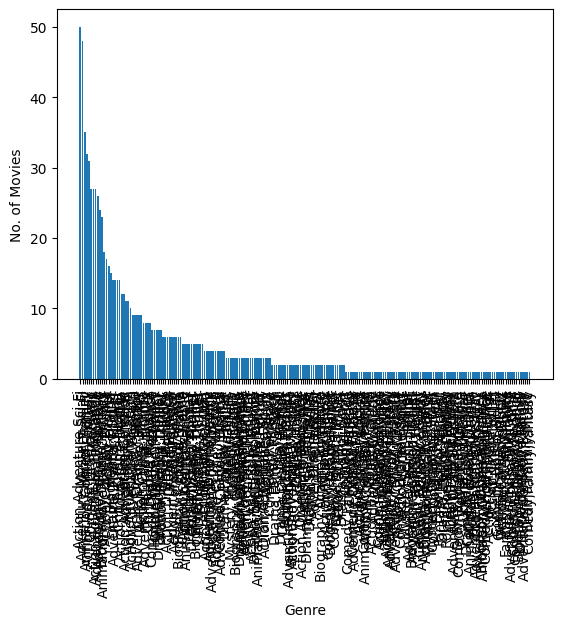

In [72]:
#no. of movies in each genre
val=df['Genre'].value_counts()
print(val)
fig=plt.figure()
plt.bar(df['Genre'].unique(),val)
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('No. of Movies')
plt.show()

In [10]:
#top 5 directors with most movies
df.groupby('Director')['Title'].count().nlargest(5)

Director
Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Michael Bay           6
Paul W.S. Anderson    6
Name: Title, dtype: int64

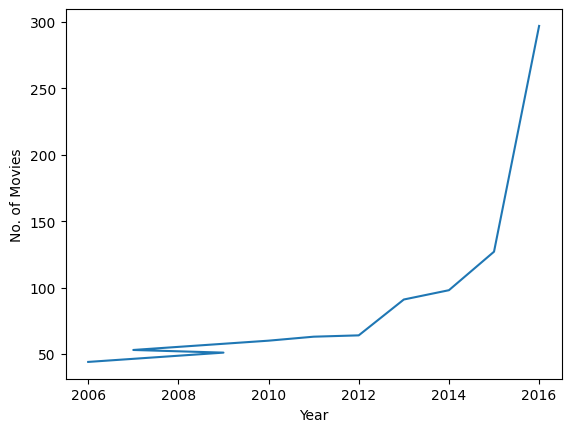

In [11]:
#line plot for no. of movies released each year
line=df['Year'].value_counts()
plt.plot(line)
plt.xlabel('Year')
plt.ylabel('No. of Movies')
plt.show()

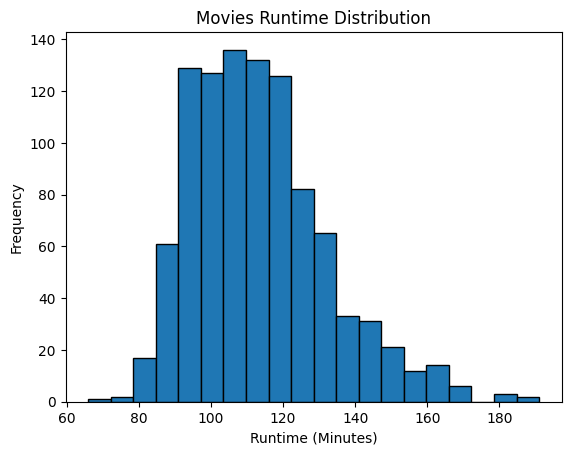

In [12]:
#histogram for distribution of movies runtime
plt.hist(df['Runtime (Minutes)'], bins=20, edgecolor='black')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.title('Movies Runtime Distribution')
plt.show()

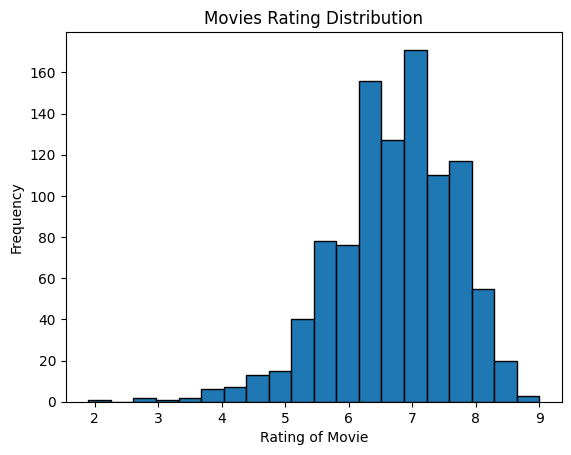

In [13]:
#Movie Rating Distribution
plt.hist(df['Rating'],bins=20 , edgecolor= 'black')
plt.xlabel('Rating of Movie')
plt.ylabel('Frequency')
plt.title('Movies Rating Distribution')
plt.show()

In [14]:
#corelation coefficient beween movie rating and runtime
df['Rating'].corr(df['Runtime (Minutes)'])

0.3922142455250512

In [15]:
# Three most frquent Actors in dataset
df['Actors'].str.split(',').explode().value_counts().nlargest(3)

Christian Bale      11
Mark Wahlberg       11
 Woody Harrelson     9
Name: Actors, dtype: int64

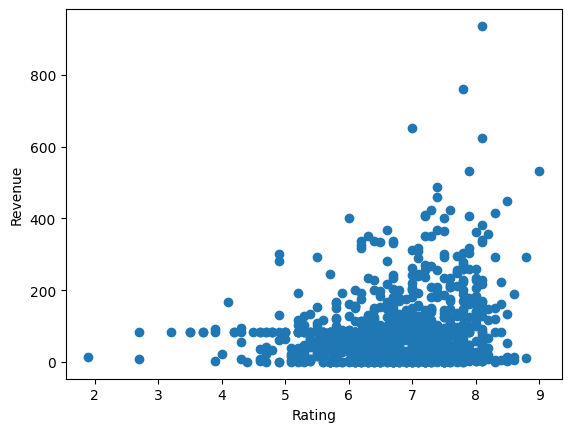

In [16]:
#scatter plot between Revenue and Rating
plt.scatter(df['Rating'],df['Revenue (Millions)'])
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

<Axes: xlabel='Year'>

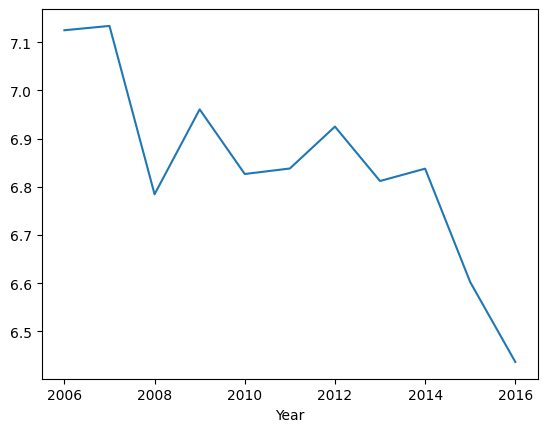

In [17]:
#Average Movie rating over the Years
df.groupby('Year')['Rating'].mean().plot()

In [28]:
#most common Director Actor pair 
df.groupby(['Director','Actors'])['Title'].count().nlargest(3)

Director          Actors                                                             
David Yates       Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            2
Francis Lawrence  Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Michael Bay       Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   2
Name: Title, dtype: int64

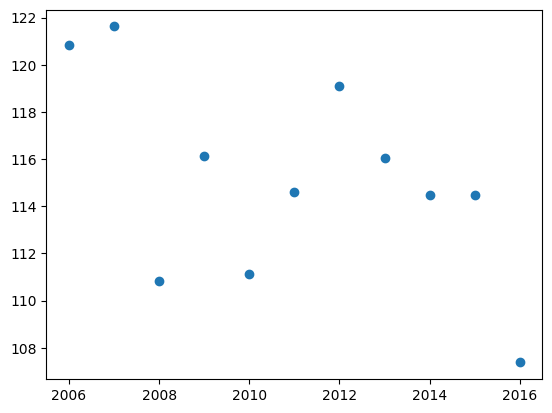

In [40]:
# Movie runtime vs Year
# There is no relation between average movie runtime and years
data=df.groupby('Year')['Runtime (Minutes)'].mean()
plt.scatter(data.index,data.values)

C:\Users\dines\AppData\Local\Temp\ipykernel_25284\1891668601.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Year')['Rating','Revenue (Millions)'].mean().plot(kind='bar')


<Axes: xlabel='Year'>

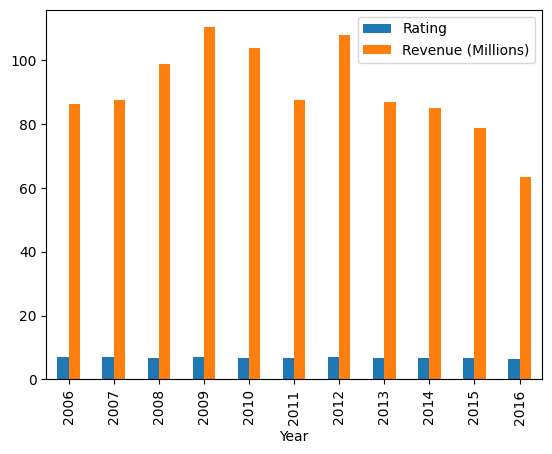

In [74]:

df.groupby('Year')['Rating','Revenue (Millions)'].mean().plot(kind='bar')

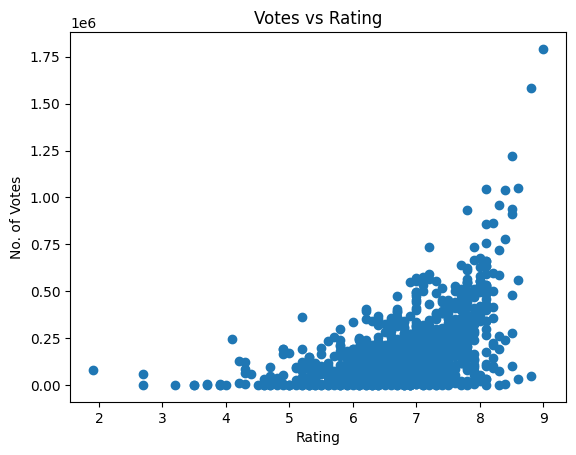

In [77]:
# relation between no. of votes and movie Rating
plt.scatter(df.Rating,df.Votes)
plt.xlabel('Rating')
plt.ylabel('No. of Votes')
plt.title('Votes vs Rating')
plt.show()

<Axes: xlabel='Genre'>

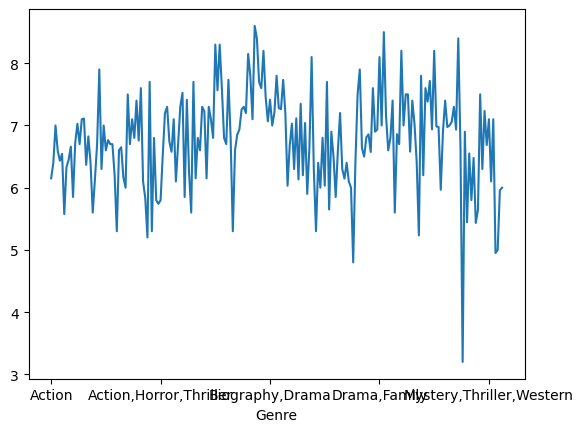

In [81]:
df.groupby('Genre')['Rating'].mean().plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x20284e66b00>,
 'caps': [<matplotlib.lines.Line2D at 0x20284e672b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20284e667a0>],
 'medians': [<matplotlib.lines.Line2D at 0x20284e67a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x20284e67e80>],
 'means': []}

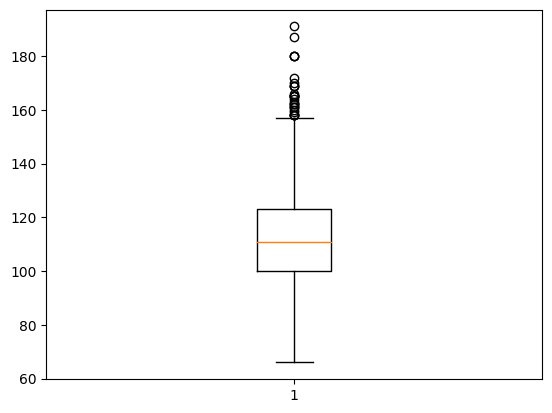

In [83]:
plt.boxplot(df['Runtime (Minutes)'])